In [2]:
import sys
import numpy as np
import h5py
from matplotlib import pyplot as plt
from pathlib import Path

from cellpose import models, utils, plot
from cellpose.io import logger_setup, imread
logger_setup();

2023-06-25 21:18:54,740 [INFO] WRITING LOG OUTPUT TO /home/rai/.cellpose/run.log
2023-06-25 21:18:54,740 [INFO] 
cellpose version: 	2.2.2 
platform:       	linux 
python version: 	3.11.3 
torch version:  	2.0.1+cu117


In [3]:
import IPython

%load_ext autoreload
%autoreload 2

In [4]:
# Open the HDF5 file
DATA_FOLDER = Path("/home/rai/Documents/MSCE/Sem2/ami/project_datashare")
filepath = DATA_FOLDER / "sample01.pre"
file = h5py.File(filepath, 'r')

# Access the dataset
# List dataset in the file
amplitude = file['amplitude/images']
phase = file['phase/images']

nimgs = np.shape(amplitude)[0]

In [7]:
imgs_idx = range(0, 100)

imgs_phase = []
imgs_ampl = []
for img_idx in imgs_idx:
    imgs_phase.append(phase[img_idx])
    imgs_ampl.append(amplitude[img_idx])

In [8]:
model = models.Cellpose(gpu=True, model_type='cyto')
masks_phase, flows_phase, styles_phase, diams_ampl = model.eval(imgs_phase, diameter=None, channels=[0,0],
                                         flow_threshold=0.4, do_3D=False, cellprob_threshold=-0.0, min_size=-1, augment=True, net_avg=True, resample=True)

2023-06-25 21:20:03,324 [INFO] ** TORCH CUDA version installed and working. **
2023-06-25 21:20:03,325 [INFO] >>>> using GPU
2023-06-25 21:20:03,325 [INFO] >> cyto << model set to be used
2023-06-25 21:20:03,400 [INFO] >>>> model diam_mean =  30.000 (ROIs rescaled to this size during training)
2023-06-25 21:20:03,402 [INFO] ~~~ ESTIMATING CELL DIAMETER(S) ~~~
2023-06-25 21:20:43,564 [INFO] 92%|#########2| 92/100 [00:40<00:03,  2.02it/s]
2023-06-25 21:20:43,866 [INFO] No cell pixels found.
2023-06-25 21:20:46,823 [INFO] 100%|##########| 100/100 [00:43<00:00,  2.30it/s]
2023-06-25 21:20:46,823 [INFO] estimated cell diameter(s) in 43.42 sec
2023-06-25 21:20:46,823 [INFO] >>> diameter(s) = 
2023-06-25 21:20:46,824 [INFO] [26.97, 31.98, 26.23, 30.00, 39.83, 30.00, 17.73, 17.84, 17.20, 16.64, 16.50, 23.92, 20.81, 25.12, 27.34, 30.82, 30.00, 15.45, 20.40, 17.79, 30.00, 18.23, 26.32, 34.71, 24.04, 24.70, 15.88, 33.57, 30.00, 27.96, 18.09, 17.95, 23.62, 20.12, 24.64, 28.55, 20.15, 22.72, 29.66,

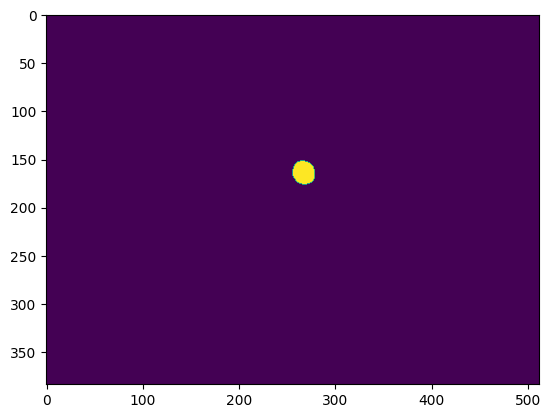

In [9]:
plt.imshow(masks_phase[4])

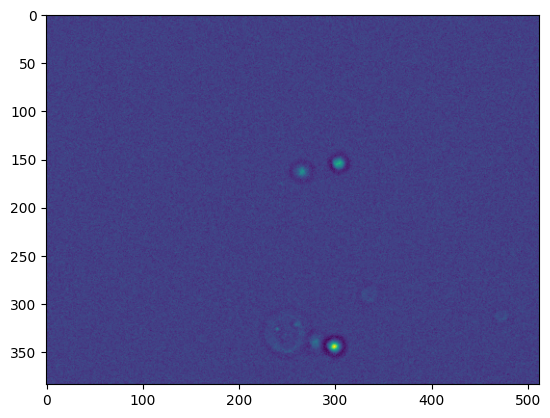

In [10]:
plt.imshow(imgs_ampl[4])

In [11]:
def image_to_masks(image):
    unique_labels = np.unique(image)  # Get the unique labels in the image

    masks = []
    for label in unique_labels:
        if label == 0:
            continue  # Skip the background label

        mask = np.where(image == label, 255, 0).astype(np.uint8)  # Convert to CV_8UC1 format
        masks.append(mask)

    return masks

In [12]:
from feature_extractor import FeatureExtractor
masks_array = []
for idx, phase_img in enumerate(imgs_phase):
    masks = image_to_masks(masks_phase[idx])
    masks_array.append(masks)
fe = FeatureExtractor(imgs_phase, imgs_ampl, masks_array)
fe.extract_features()

/home/rai/Documents/MSCE/Sem2/ami/Group06/notebooks/feature_extraction.py:133: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt((kernel_pixels / (kernel_pixels - 1)) * (phase_squared_kernel - phase_kernel_squared))


,Volume,Roundness,Opacity,Amplitude Variance,Amplitude Skewness,Dry Mass Density,Max Phase,Phase Variance,Phase Skewness,DC1,DC2,DC3
0,335.455433,0.922908,12.233833,0.001193,0.451795,0.058539,2.970703,0.654028,0.641915,0.328041,33.180123,-0.056940
1,218.376582,0.857438,12.120816,0.001647,0.503977,0.050292,1.867188,0.252883,0.735922,0.277960,31.617562,-0.049465
2,397.181887,0.864605,12.313433,0.000328,0.311589,0.054496,2.246094,0.526834,0.268666,0.291652,22.550519,-0.061385
3,53.409377,0.784959,12.500000,0.000005,-0.196262,0.006130,0.102112,0.000383,0.028868,0.027069,0.586831,-0.035403
4,241.835004,0.918540,12.278369,0.001011,0.843964,0.086293,3.376953,0.904529,0.578630,0.415207,59.771453,-0.053718
...,...,...,...,...,...,...,...,...,...,...,...,...
1714,109.721437,0.883030,12.500000,0.000531,0.708225,0.050394,1.920898,0.194657,0.989906,0.287060,51.936026,-0.039885
1715,39.429105,0.971262,12.529668,0.000128,-1.802841,0.003177,0.156738,0.003804,-0.149210,NaN,NaN,NaN
1716,87.743976,0.790058,12.538740,0.000247,-0.111371,0.131320,2.484375,0.543050,-0.171438,0.435723,153.980339,-0.035181
1717,30.815836,0.864070,12.463663,0.000296,0.755397,0.044139,1.302734,0.109009,0.941462,0.177386,48.081112,-0.025678


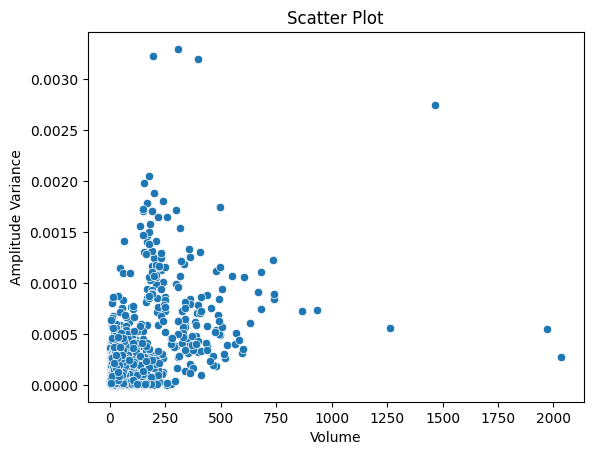

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = fe.features

sns.scatterplot(data=df, x='Volume', y='Amplitude Variance')
plt.title('Scatter Plot')
plt.show()

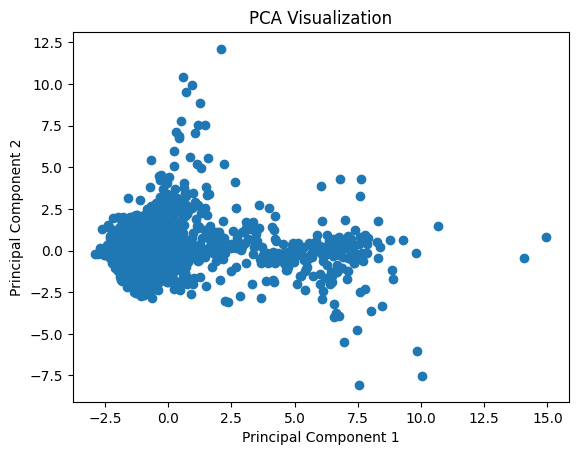

In [49]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df' and contains the features
df = fe.features
# Step 1: Preprocess the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.dropna())

# Step 2: Perform PCA
pca = PCA()
pca.fit(scaled_data)

# Step 3: Choose the number of components
explained_variance_ratio = pca.explained_variance_ratio_
variance_threshold = 0.95
total_variance = 0
n_components = 0

for explained_variance in explained_variance_ratio:
    total_variance += explained_variance
    n_components += 1
    if total_variance >= variance_threshold:
        break

# Step 4: Perform PCA with the chosen number of components
pca = PCA(n_components=n_components)
pca.fit(scaled_data)
transformed_data = pca.transform(scaled_data)

# Step 5: Create a scatter plot of the transformed data
plt.scatter(transformed_data[:, 0], transformed_data[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization')
plt.show()

/home/rai/.pyenv/versions/3.11.3/envs/ami/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


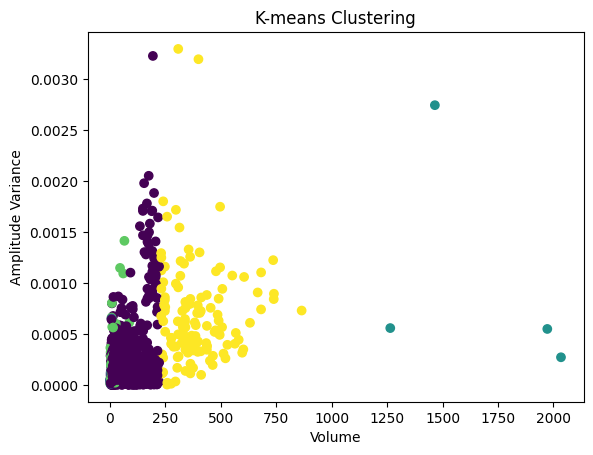

In [50]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df' and contains the features
df = fe.features
# Step 1: Drop rows with NaN values
df.dropna(axis=0, inplace=True)

# Step 2: Prepare the data
X = df.values

# Step 3: Choose the number of clusters
n_clusters = 5  # Specify the desired number of clusters

# Step 4: Apply K-means clustering
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X)

# Step 5: Get the cluster labels
cluster_labels = kmeans.labels_

# Step 6: Add the cluster labels back to the DataFrame
df['Cluster'] = cluster_labels

# Step 7: Visualize the clusters
plt.scatter(df['Volume'], df['Amplitude Variance'], c=df['Cluster'])
plt.xlabel('Volume')
plt.ylabel('Amplitude Variance')
plt.title('K-means Clustering')
plt.show()

/home/rai/.pyenv/versions/3.11.3/envs/ami/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


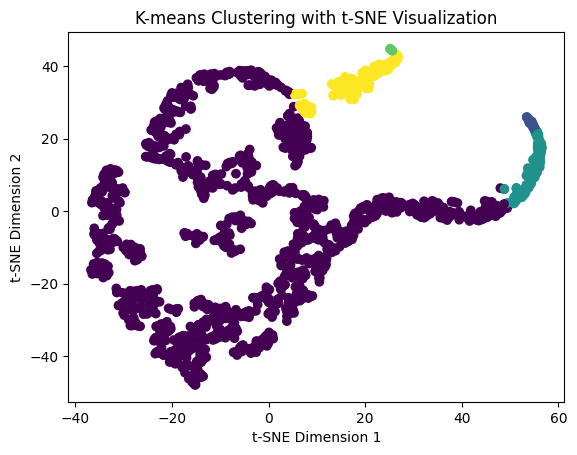

In [51]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df' and contains the features
df = fe.features
# Step 1: Drop rows with NaN values
df.dropna(axis=0, inplace=True)

# Step 2: Prepare the data
X = df.values

# Step 3: Choose the number of clusters
n_clusters = 5  # Specify the desired number of clusters

# Step 4: Apply K-means clustering
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X)

# Step 5: Get the cluster labels
cluster_labels = kmeans.labels_

# Step 6: Add the cluster labels back to the DataFrame
df['Cluster'] = cluster_labels

# Step 7: Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
tsne_data = tsne.fit_transform(X)

# Step 8: Visualize the clusters using t-SNE
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=df['Cluster'])
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('K-means Clustering with t-SNE Visualization')
plt.show()

/home/rai/.pyenv/versions/3.11.3/envs/ami/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


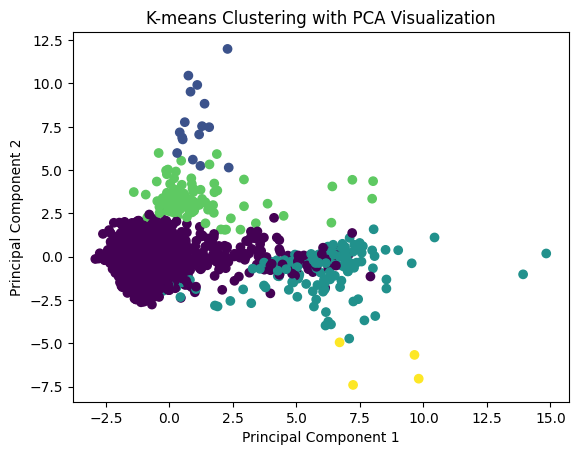

In [52]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df' and contains the features
df = fe.features
# Step 1: Drop rows with NaN values
df.dropna(axis=0, inplace=True)

# Step 2: Prepare the data
X = df.values

# Step 3: Choose the number of clusters
n_clusters = 5  # Specify the desired number of clusters

# Step 4: Apply K-means clustering
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X)

# Step 5: Get the cluster labels
cluster_labels = kmeans.labels_

# Step 6: Add the cluster labels back to the DataFrame
df['Cluster'] = cluster_labels

# Step 7: Apply PCA for dimensionality reduction
# Step 1: Preprocess the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.dropna())

# Step 2: Perform PCA
pca = PCA()
pca.fit(scaled_data)

# Step 3: Choose the number of components
explained_variance_ratio = pca.explained_variance_ratio_
variance_threshold = 0.95
total_variance = 0
n_components = 0

for explained_variance in explained_variance_ratio:
    total_variance += explained_variance
    n_components += 1
    if total_variance >= variance_threshold:
        break

# Step 4: Perform PCA with the chosen number of components
pca = PCA(n_components=n_components)
pca.fit(scaled_data)
transformed_data = pca.transform(scaled_data)

# Step 8: Visualize the clusters using PCA
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=df['Cluster'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering with PCA Visualization')
plt.show()

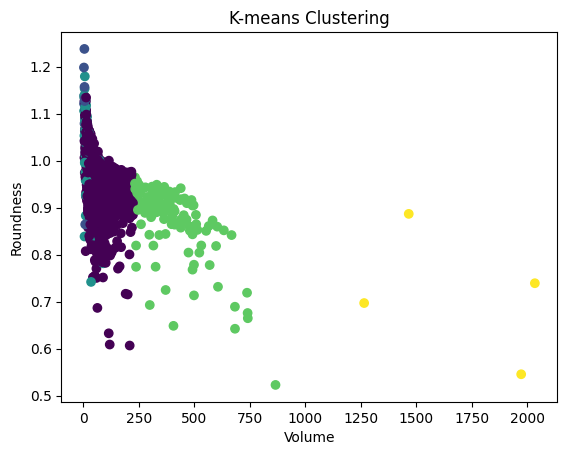

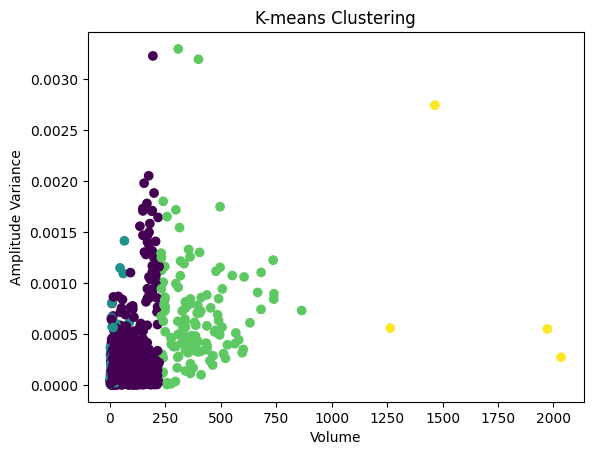

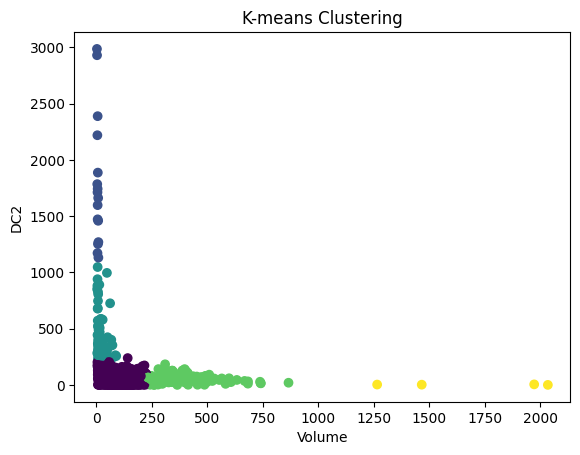

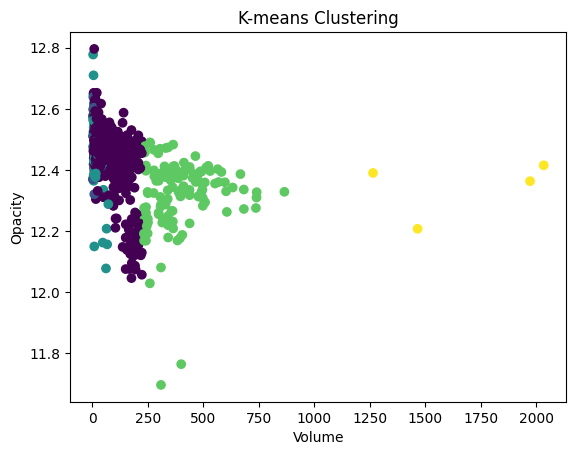

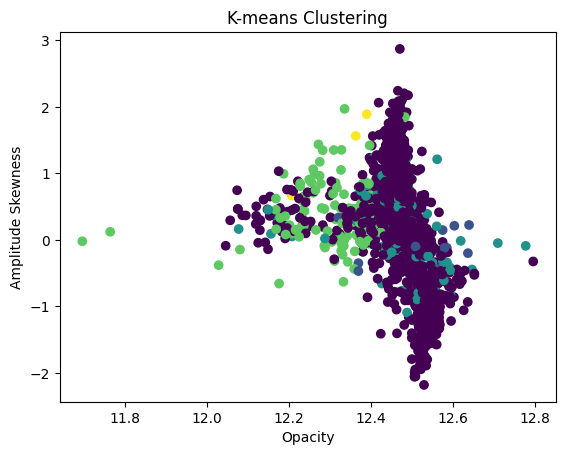

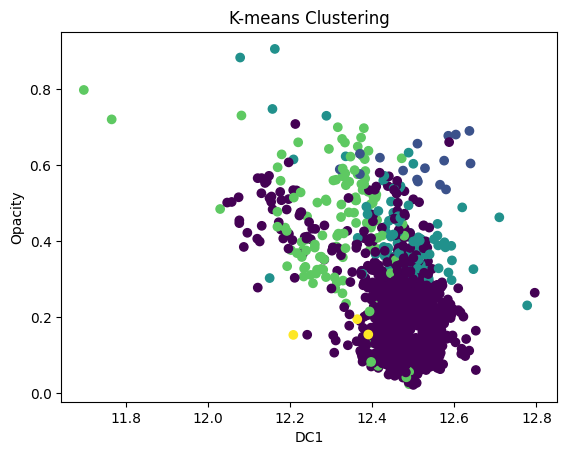

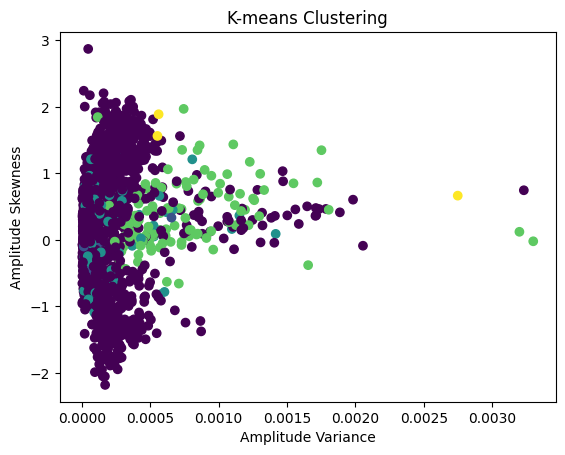

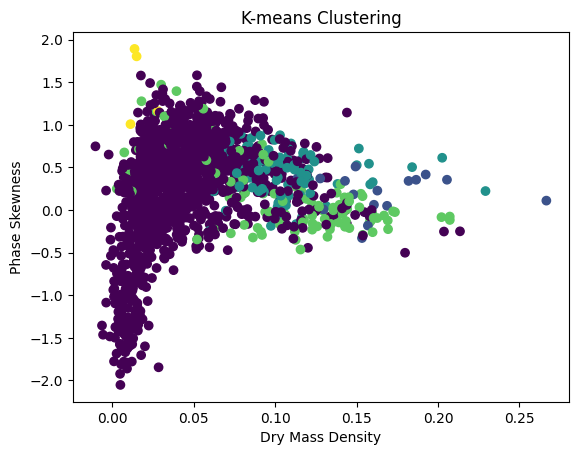

In [40]:
# Step 7: Visualize the clusters
plt.scatter(df['Volume'], df['Roundness'], c=df['Cluster'])
plt.xlabel('Volume')
plt.ylabel('Roundness')
plt.title('K-means Clustering')
plt.show()

# Step 7: Visualize the clusters
plt.scatter(df['Volume'], df['Amplitude Variance'], c=df['Cluster'])
plt.xlabel('Volume')
plt.ylabel('Amplitude Variance')
plt.title('K-means Clustering')
plt.show()

plt.scatter(df['Volume'], df['DC2'], c=df['Cluster'])
plt.xlabel('Volume')
plt.ylabel('DC2')
plt.title('K-means Clustering')
plt.show()

# Step 7: Visualize the clusters
plt.scatter(df['Volume'], df['Opacity'], c=df['Cluster'])
plt.xlabel('Volume')
plt.ylabel('Opacity')
plt.title('K-means Clustering')
plt.show()

# Step 7: Visualize the clusters
plt.scatter(df['Opacity'], df['Amplitude Skewness'], c=df['Cluster'])
plt.xlabel('Opacity')
plt.ylabel('Amplitude Skewness')
plt.title('K-means Clustering')
plt.show()

plt.scatter(df['Opacity'], df['DC1'], c=df['Cluster'])
plt.xlabel('DC1')
plt.ylabel('Opacity')
plt.title('K-means Clustering')
plt.show()

plt.scatter(df['Amplitude Variance'], df['Amplitude Skewness'], c=df['Cluster'])
plt.xlabel('Amplitude Variance')
plt.ylabel('Amplitude Skewness')
plt.title('K-means Clustering')
plt.show()

plt.scatter(df['Dry Mass Density'], df['Phase Skewness'], c=df['Cluster'])
plt.xlabel('Dry Mass Density')
plt.ylabel('Phase Skewness')
plt.title('K-means Clustering')
plt.show()

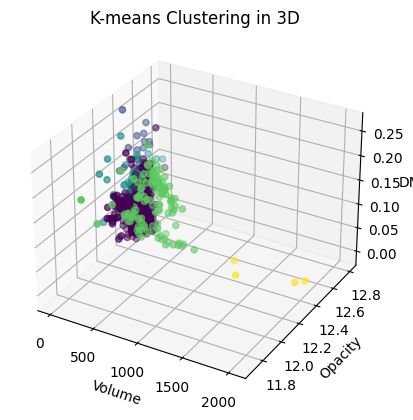

In [38]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Volume'], df['Opacity'], df['Dry Mass Density'], c=df['Cluster'])

ax.set_xlabel('Volume')
ax.set_ylabel('Opacity')
ax.set_zlabel('DMD')
ax.set_title('K-means Clustering in 3D')

plt.show()

In [41]:
# Open the HDF5 file
DATA_FOLDER = Path("/home/rai/Documents/MSCE/Sem2/ami/project_datashare")
filepath = DATA_FOLDER / "prediction.seg"
file = h5py.File(filepath, 'r')

# Access the dataset
# List dataset in the file
amplitude = file['amplitude/images']
phase = file['phase/images']
label = file['label/ground_truth']
mask = file['mask/images']

nimgs = np.shape(amplitude)[0]

mask_array = []
for img_idx in range(nimgs):
    mask_array.append([mask[img_idx]])

In [42]:
fe2 = FeatureExtractor(phase, amplitude, mask_array)
fe2.extract_features()
df2 = fe2.features

/home/rai/Documents/MSCE/Sem2/ami/Group06/notebooks/feature_extraction.py:133: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt((kernel_pixels / (kernel_pixels - 1)) * (phase_squared_kernel - phase_kernel_squared))


In [43]:
df2['Labels'] = label

In [79]:
fe.extract_features()

/home/rai/Documents/MSCE/Sem2/ami/Group06/notebooks/feature_extraction.py:133: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt((kernel_pixels / (kernel_pixels - 1)) * (phase_squared_kernel - phase_kernel_squared))


,Volume,Roundness,Opacity,Amplitude Variance,Amplitude Skewness,Dry Mass Density,Max Phase,Phase Variance,Phase Skewness,DC1,DC2,DC3
0,335.455433,0.922908,12.233833,0.001193,0.451795,0.058539,2.970703,0.654028,0.641915,0.328041,33.180123,-0.056940
1,218.376582,0.857438,12.120816,0.001647,0.503977,0.050292,1.867188,0.252883,0.735922,0.277960,31.617562,-0.049465
2,397.181887,0.864605,12.313433,0.000328,0.311589,0.054496,2.246094,0.526834,0.268666,0.291652,22.550519,-0.061385
3,53.409377,0.784959,12.500000,0.000005,-0.196262,0.006130,0.102112,0.000383,0.028868,0.027069,0.586831,-0.035403
4,241.835004,0.918540,12.278369,0.001011,0.843964,0.086293,3.376953,0.904529,0.578630,0.415207,59.771453,-0.053718
...,...,...,...,...,...,...,...,...,...,...,...,...
1714,109.721437,0.883030,12.500000,0.000531,0.708225,0.050394,1.920898,0.194657,0.989906,0.287060,51.936026,-0.039885
1715,39.429105,0.971262,12.529668,0.000128,-1.802841,0.003177,0.156738,0.003804,-0.149210,NaN,NaN,NaN
1716,87.743976,0.790058,12.538740,0.000247,-0.111371,0.131320,2.484375,0.543050,-0.171438,0.435723,153.980339,-0.035181
1717,30.815836,0.864070,12.463663,0.000296,0.755397,0.044139,1.302734,0.109009,0.941462,0.177386,48.081112,-0.025678
